# Linear Visualization

In [2]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [3]:
# Load data
df = pd.read_excel('data/Monthly Mastersheet.xlsx')

# Ensure date is datetime and set index
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)

# USD Coin | GDP ~ Lagged LogVol + LFPR + r 
R^2 improved 20%

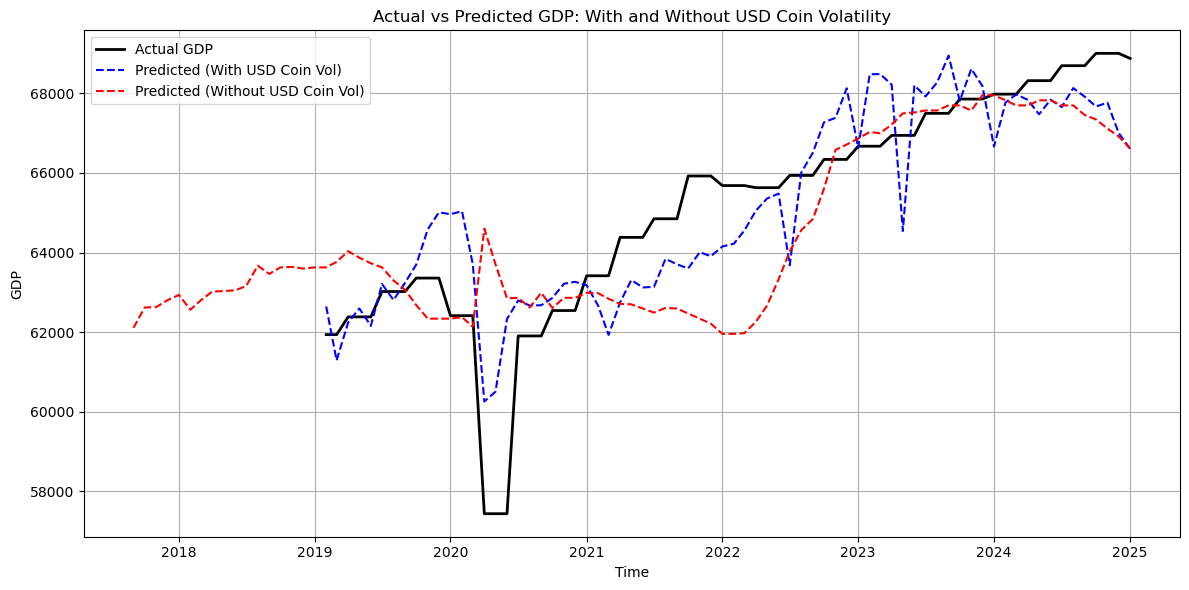


Model WITH USD Coin Volatility:
                            OLS Regression Results                            
Dep. Variable:                    GDP   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     62.70
Date:                Fri, 13 Jun 2025   Prob (F-statistic):           1.51e-19
Time:                        09:55:29   Log-Likelihood:                -624.68
No. Observations:                  72   AIC:                             1257.
Df Residuals:                      68   BIC:                             1266.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const

In [4]:
# --- Step 1: Create lagged volatility predictor ---
df['Lagged_LogVol_USD'] = df['USD Coin'].shift(1)

# --- Step 2: Drop rows with any NaNs in the relevant columns ---
model_cols_with = ['Lagged_LogVol_USD', 'LFPR', 'r', 'GDP']
model_cols_without = ['LFPR', 'r', 'GDP']

df_with = df[model_cols_with].dropna()
df_without = df[model_cols_without].dropna()

# --- Step 3: Build models ---
# Model with crypto volatility
X1 = sm.add_constant(df_with[['Lagged_LogVol_USD', 'LFPR', 'r']])
y1 = df_with['GDP']
model1 = sm.OLS(y1, X1).fit()

# Model without crypto volatility
X2 = sm.add_constant(df_without[['LFPR', 'r']])
y2 = df_without['GDP']
model2 = sm.OLS(y2, X2).fit()

# --- Step 4: Plot actual vs predicted ---
# Align indexes and create common time axis
time_index_with = df_with.index
time_index_without = df_without.index

# Predicted values
pred_with = model1.predict(X1)
pred_without = model2.predict(X2)

# Plot actual vs. predicted GDP
plt.figure(figsize=(12, 6))
plt.plot(time_index_with, y1, label='Actual GDP', color='black', linewidth=2)
plt.plot(time_index_with, pred_with, label='Predicted (With USD Coin Vol)', linestyle='--', color='blue')
plt.plot(time_index_without, pred_without, label='Predicted (Without USD Coin Vol)', linestyle='--', color='red')

plt.xlabel('Time')
plt.ylabel('GDP')
plt.title('Actual vs Predicted GDP: With and Without USD Coin Volatility')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# --- Step 5: Print comparison ---
print("\nModel WITH USD Coin Volatility:")
print(model1.summary())

print("\nModel WITHOUT USD Coin Volatility:")
print(model2.summary())

r2_with = model1.rsquared
r2_without = model2.rsquared
print(f"\nR-squared WITH USD Coin Vol: {r2_with:.4f}")
print(f"R-squared WITHOUT USD Coin Vol: {r2_without:.4f}")
print(f"Difference in R-squared: {r2_with - r2_without:.4f}")


# Bitcoin | GDP ~ Lagged LogVol + LFPR + M1
R^2 improved 1%, not as helpful as USD coin in this combo prediction

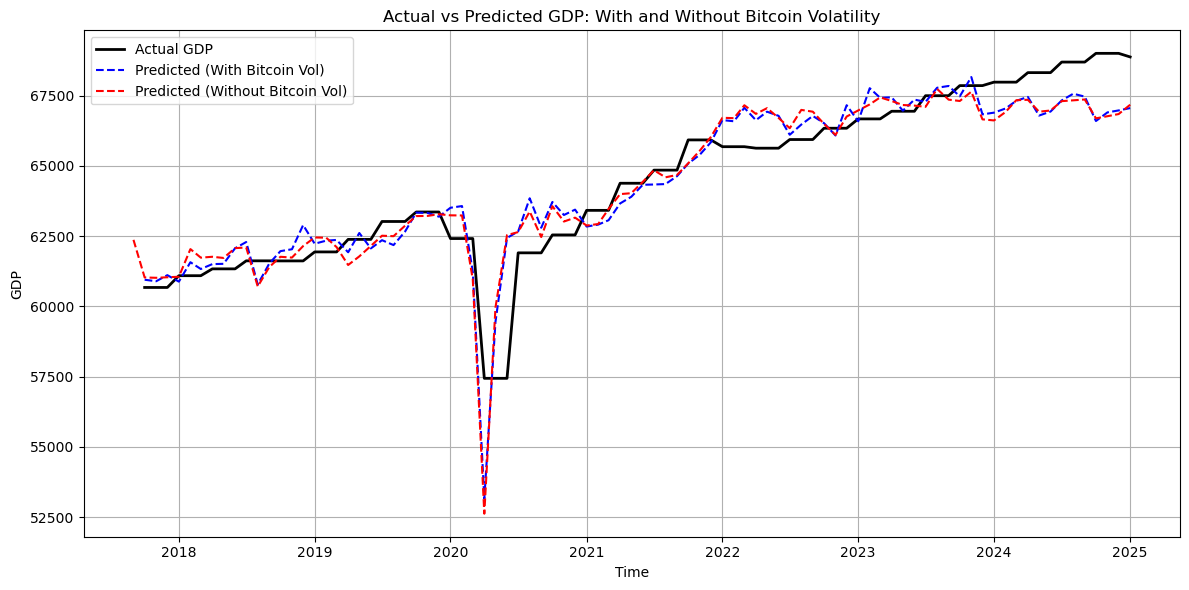


Model WITH Bitcoin Volatility:
                            OLS Regression Results                            
Dep. Variable:                    GDP   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     156.9
Date:                Fri, 13 Jun 2025   Prob (F-statistic):           2.54e-34
Time:                        09:59:17   Log-Likelihood:                -743.15
No. Observations:                  88   AIC:                             1494.
Df Residuals:                      84   BIC:                             1504.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------

In [ ]:
# --- Step 1: Create lagged volatility predictor ---
df['Lagged_LogVol_Bitcoin'] = df['Bitcoin'].shift(1)

# --- Step 2: Drop rows with any NaNs in the relevant columns ---
model_cols_with = ['GDP','Lagged_LogVol_Bitcoin', 'LFPR', 'M1']
model_cols_without = ['GDP','LFPR', 'M1']

df_with = df[model_cols_with].dropna()
df_without = df[model_cols_without].dropna()

# --- Step 3: Build models ---
# Model with crypto volatility
X1 = sm.add_constant(df_with[['Lagged_LogVol_Bitcoin', 'LFPR', 'M1']])
y1 = df_with['GDP']
model1 = sm.OLS(y1, X1).fit()

# Model without crypto volatility
X2 = sm.add_constant(df_without[['LFPR', 'M1']])
y2 = df_without['GDP']
model2 = sm.OLS(y2, X2).fit()

# --- Step 4: Plot actual vs predicted ---
# Align indexes and create common time axis
time_index_with = df_with.index
time_index_without = df_without.index

# Predicted values
pred_with = model1.predict(X1)
pred_without = model2.predict(X2)

# Plot actual vs. predicted GDP
plt.figure(figsize=(12, 6))
plt.plot(time_index_with, y1, label='Actual GDP', color='black', linewidth=2)
plt.plot(time_index_with, pred_with, label='Predicted (With Bitcoin Vol)', linestyle='--', color='blue')
plt.plot(time_index_without, pred_without, label='Predicted (Without Bitcoin Vol)', linestyle='--', color='red')

plt.xlabel('Time')
plt.ylabel('GDP')
plt.title('Actual vs Predicted GDP: With and Without Bitcoin Volatility')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# --- Step 5: Print comparison ---
print("\nModel WITH Bitcoin Volatility:")
print(model1.summary())

print("\nModel WITHOUT Bitcoin Volatility:")
print(model2.summary())

r2_with = model1.rsquared
r2_without = model2.rsquared
print(f"\nR-squared WITH Bitcoin Vol: {r2_with:.4f}")
print(f"R-squared WITHOUT Bitcoin Vol: {r2_without:.4f}")
print(f"Difference in R-squared: {r2_with - r2_without:.4f}")


# Tether | GDP ~ Lagged LogVol + r
R^2 improved 1%, not as helpful as USD coin in this combo prediction

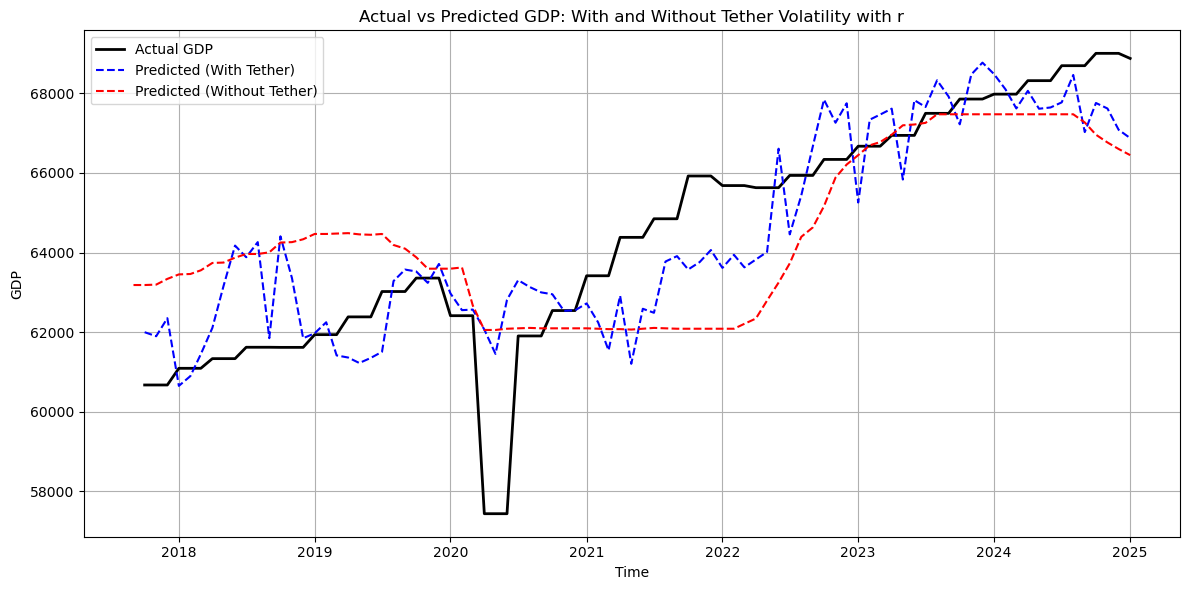


Model WITH Tether Volatility:
                            OLS Regression Results                            
Dep. Variable:                    GDP   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     104.7
Date:                Fri, 13 Jun 2025   Prob (F-statistic):           1.18e-23
Time:                        10:05:39   Log-Likelihood:                -771.55
No. Observations:                  88   AIC:                             1549.
Df Residuals:                      85   BIC:                             1557.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
c

In [16]:
# --- Step 1: Create lagged volatility predictor ---
df['Lagged_LogVol_Tether'] = df['Tether'].shift(1)

# --- Step 2: Drop rows with any NaNs in the relevant columns ---
df_with = ['GDP','Lagged_LogVol_Tether', 'r']
df_without = ['GDP','r']
df_with = df[model_cols_with].dropna()
df_without = df[model_cols_without].dropna()

# --- Step 3: Build models ---
# Model with crypto volatility
X1 = sm.add_constant(df_with[['Lagged_LogVol_Tether', 'r']])
y1 = df_with['GDP']
model1 = sm.OLS(y1, X1).fit()

# Model without crypto volatility
X2 = sm.add_constant(df_without[['r']])
y2 = df_without['GDP']
model2 = sm.OLS(y2, X2).fit()

# --- Step 4: Plot actual vs predicted ---
# Align indexes and create common time axis
time_index_with = df_with.index
time_index_without = df_without.index

# Predicted values
pred_with = model1.predict(X1)
pred_without = model2.predict(X2)

# Plot actual vs. predicted GDP
plt.figure(figsize=(12, 6))
plt.plot(time_index_with, y1, label='Actual GDP', color='black', linewidth=2)
plt.plot(time_index_with, pred_with, label='Predicted (With Tether)', linestyle='--', color='blue')
plt.plot(time_index_without, pred_without, label='Predicted (Without Tether)', linestyle='--', color='red')

plt.xlabel('Time')
plt.ylabel('GDP')
plt.title('Actual vs Predicted GDP: With and Without Tether Volatility with r')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# --- Step 5: Print comparison ---
print("\nModel WITH Tether Volatility:")
print(model1.summary())

print("\nModel WITHOUT Tether Volatility:")
print(model2.summary())

r2_with = model1.rsquared
r2_without = model2.rsquared
print(f"\nR-squared WITH Tether Vol: {r2_with:.4f}")
print(f"R-squared WITHOUT Tether Vol: {r2_without:.4f}")
print(f"Difference in R-squared: {r2_with - r2_without:.4f}")


['GDP', 'Lagged_LogVol_Tether', 'LFPR', 'r']
['Bitcoin', 'Tether', 'Litecoin', 'XRP', 'Ethereum', 'Dogecoin', 'Cardano', 'USD Coin', 'VIX', 'MOVE', 'LFPR', 'CPI', 'r', 'M1', 'GDP', 'IM', 'EX', 'CC', 'CC Monthly % Change', 'Bitcoin Price', 'Lagged_LogVol_USD', 'Lagged_LogVol_Bitcoin', 'Lagged_LogVol_Tether']


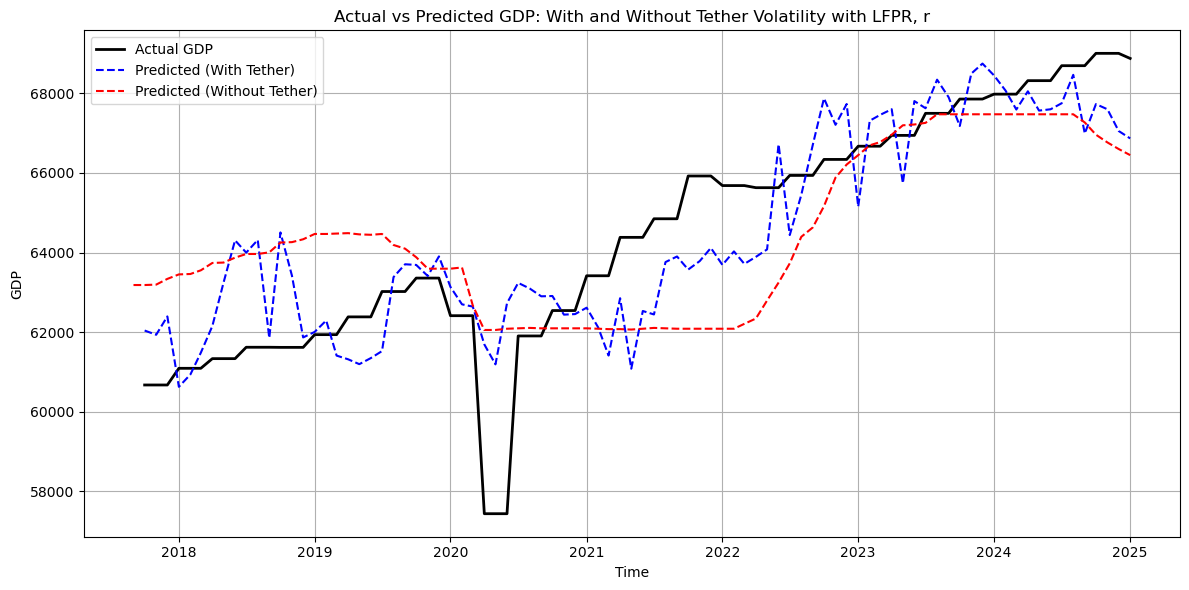

In [ ]:
model_cols_with = ['GDP','Lagged_LogVol_Tether','LFPR','r']
model_cols_without = ['GDP','LFPR','r']

df_with = df[model_cols_with].dropna()
df_without = df[model_cols_without].dropna()

# --- Step 3: Build models ---
# Model with crypto volatility
X1 = sm.add_constant(df_with[['Lagged_LogVol_Tether', 'LFPR','r']])
y1 = df_with['GDP']
model1 = sm.OLS(y1, X1).fit()

# Model without crypto volatility
X2 = sm.add_constant(df_without[['r']])
y2 = df_without['GDP']
model2 = sm.OLS(y2, X2).fit()

# --- Step 4: Plot actual vs predicted ---
# Align indexes and create common time axis
time_index_with = df_with.index
time_index_without = df_without.index

# Predicted values
pred_with = model1.predict(X1)
pred_without = model2.predict(X2)

# Plot actual vs. predicted GDP
plt.figure(figsize=(12, 6))
plt.plot(time_index_with, y1, label='Actual GDP', color='black', linewidth=2)
plt.plot(time_index_with, pred_with, label='Predicted (With Tether)', linestyle='--', color='blue')
plt.plot(time_index_without, pred_without, label='Predicted (Without Tether)', linestyle='--', color='red')

plt.xlabel('Time')
plt.ylabel('GDP')
plt.title('Actual vs Predicted GDP: With and Without Tether Volatility with LFPR, r')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

['GDP', 'Lagged_LogVol_Tether', 'LFPR', 'r']
['Bitcoin', 'Tether', 'Litecoin', 'XRP', 'Ethereum', 'Dogecoin', 'Cardano', 'USD Coin', 'VIX', 'MOVE', 'LFPR', 'CPI', 'r', 'M1', 'GDP', 'IM', 'EX', 'CC', 'CC Monthly % Change', 'Bitcoin Price', 'Lagged_LogVol_USD', 'Lagged_LogVol_Bitcoin', 'Lagged_LogVol_Tether']


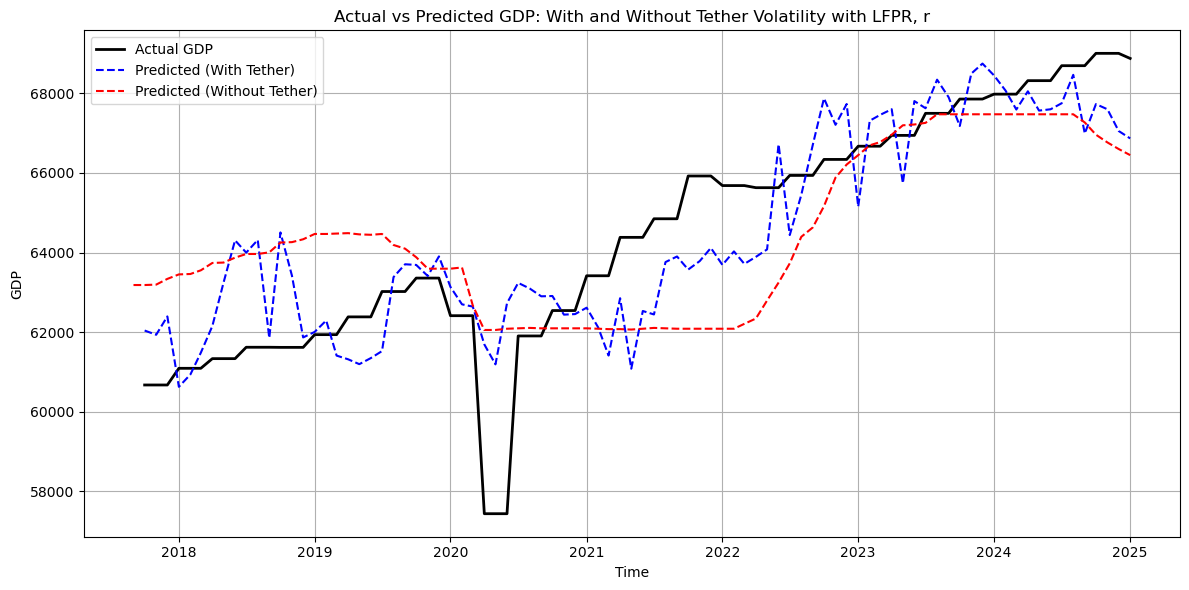

In [ ]:
model_cols_with = ['GDP','Lagged_LogVol_Tether','LFPR','r']
model_cols_without = ['GDP','LFPR','r']

df_with = df[model_cols_with].dropna()
df_without = df[model_cols_without].dropna()

# --- Step 3: Build models ---
# Model with crypto volatility
X1 = sm.add_constant(df_with[['Lagged_LogVol_Tether', 'LFPR','r']])
y1 = df_with['GDP']
model1 = sm.OLS(y1, X1).fit()

# Model without crypto volatility
X2 = sm.add_constant(df_without[['r']])
y2 = df_without['GDP']
model2 = sm.OLS(y2, X2).fit()

# --- Step 4: Plot actual vs predicted ---
# Align indexes and create common time axis
time_index_with = df_with.index
time_index_without = df_without.index

# Predicted values
pred_with = model1.predict(X1)
pred_without = model2.predict(X2)

# Plot actual vs. predicted GDP
plt.figure(figsize=(12, 6))
plt.plot(time_index_with, y1, label='Actual GDP', color='black', linewidth=2)
plt.plot(time_index_with, pred_with, label='Predicted (With Tether)', linestyle='--', color='blue')
plt.plot(time_index_without, pred_without, label='Predicted (Without Tether)', linestyle='--', color='red')

plt.xlabel('Time')
plt.ylabel('GDP')
plt.title('Actual vs Predicted GDP: With and Without Tether Volatility with LFPR, r')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

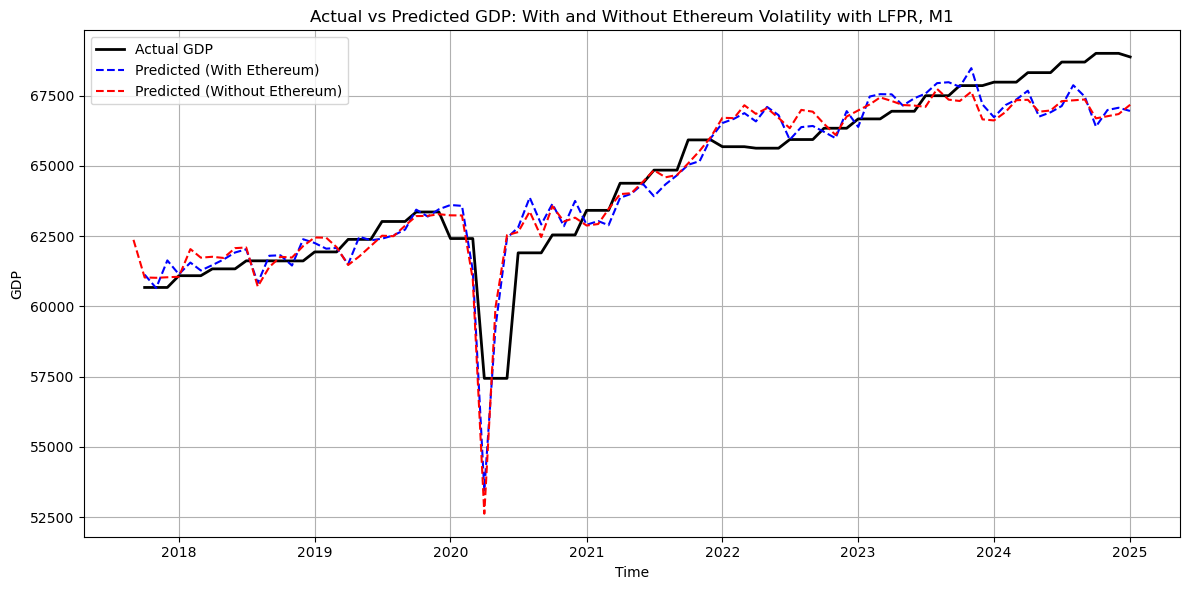

In [ ]:
# --- Step 1: Create lagged volatility predictor ---
df['Lagged_LogVol_Ethereum'] = df['Ethereum'].shift(1)

model_cols_with = ['GDP','Lagged_LogVol_Ethereum','LFPR','M1']
model_cols_without = ['GDP','LFPR','M1']

df_with = df[model_cols_with].dropna()
df_without = df[model_cols_without].dropna()

# --- Step 3: Build models ---
# Model with crypto volatility
X1 = sm.add_constant(df_with[['Lagged_LogVol_Ethereum', 'LFPR','M1']])
y1 = df_with['GDP']
model1 = sm.OLS(y1, X1).fit()

# Model without crypto volatility
X2 = sm.add_constant(df_without[['LFPR','M1']])
y2 = df_without['GDP']
model2 = sm.OLS(y2, X2).fit()

# --- Step 4: Plot actual vs predicted ---
# Align indexes and create common time axis
time_index_with = df_with.index
time_index_without = df_without.index

# Predicted values
pred_with = model1.predict(X1)
pred_without = model2.predict(X2)

# Plot actual vs. predicted GDP
plt.figure(figsize=(12, 6))
plt.plot(time_index_with, y1, label='Actual GDP', color='black', linewidth=2)
plt.plot(time_index_with, pred_with, label='Predicted (With Ethereum)', linestyle='--', color='blue')
plt.plot(time_index_without, pred_without, label='Predicted (Without Ethereum)', linestyle='--', color='red')

plt.xlabel('Time')
plt.ylabel('GDP')
plt.title('Actual GDP with inflation vs Predicted GDP: With and Without Ethereum Volatility with LFPR, M1')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#calculate Mean absolute percent error, MAPE

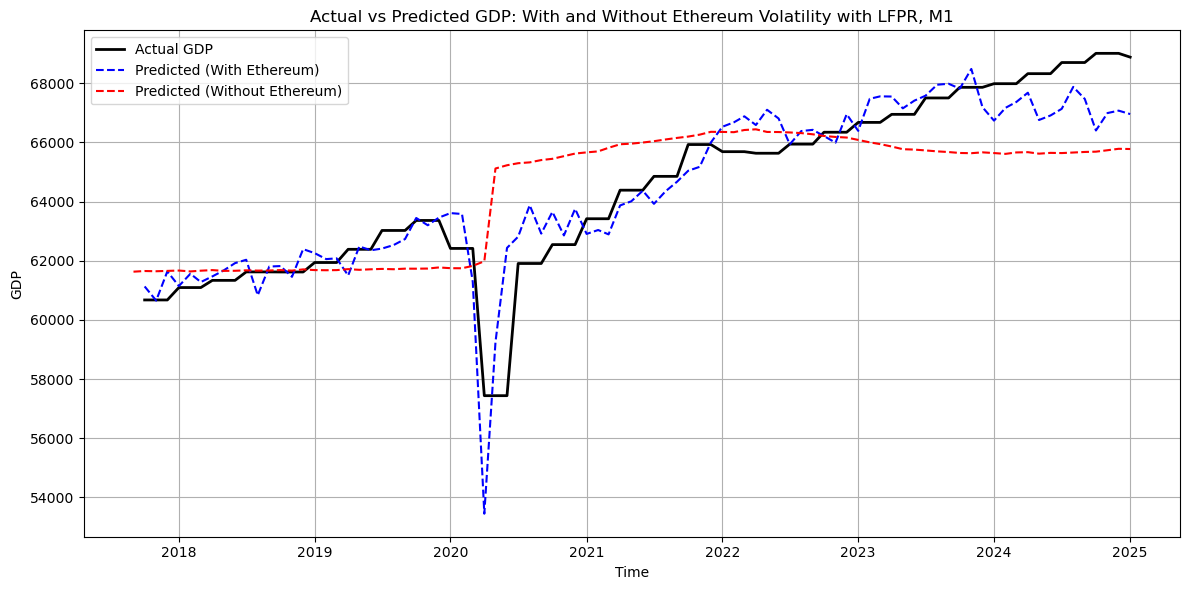

In [ ]:
# --- Step 1: Create lagged volatility predictor ---
df['Lagged_LogVol_Ethereum'] = df['Ethereum'].shift(1)

model_cols_with = ['GDP','Lagged_LogVol_Ethereum','LFPR','M1','Lagged_LogVol_USD Coin']
model_cols_without = ['GDP','Lagged_LogVol_Ethereum','LFPR','M1']

df_with = df[model_cols_with].dropna()
df_without = df[model_cols_without].dropna()

# --- Step 3: Build models ---
# Model with crypto volatility
X1 = sm.add_constant(df_with[['Lagged_LogVol_Ethereum', 'LFPR','M1','Lagged_LogVol_USD Coin']])
y1 = df_with['GDP']
model1 = sm.OLS(y1, X1).fit()

# Model without crypto volatility
X2 = sm.add_constant(df_without[['M1']])
y2 = df_without['GDP']
model2 = sm.OLS(y2, X2).fit()

# --- Step 4: Plot actual vs predicted ---
# Align indexes and create common time axis
time_index_with = df_with.index
time_index_without = df_without.index

# Predicted values
pred_with = model1.predict(X1)
pred_without = model2.predict(X2)

# Plot actual vs. predicted GDP
plt.figure(figsize=(12, 6))
plt.plot(time_index_with, y1, label='Actual GDP', color='black', linewidth=2)
plt.plot(time_index_with, pred_with, label='Predicted (With Ethereum)', linestyle='--', color='blue')
plt.plot(time_index_without, pred_without, label='Predicted (Without Ethereum)', linestyle='--', color='red')

plt.xlabel('Time')
plt.ylabel('GDP')
plt.title('Actual vs Predicted GDP: With and Without Ethereum Volatility with LFPR, M1')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()